In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ecommerce/E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.shape

(10999, 12)

In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
10994    False
10995    False
10996    False
10997    False
10998    False
Length: 10999, dtype: bool

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
# it is abserved that customer rating ranges from 1-5

df['Customer_rating'].unique()

array([2, 5, 3, 1, 4])

In [ ]:
# checking the number of customer rating

df.groupby(['Customer_rating'])[['ID']].count()

,ID
Customer_rating,
1,2235
2,2165
3,2239
4,2189
5,2171


In [ ]:
# checking the number of product delivered on time
# 0 indicate the count of customers that recieved their products on time reached.
# 1 indicate the count of customers that hasnt recieved their products on time reached.


df.groupby(['Reached.on.Time_Y.N'])[['ID']].count()

,ID
Reached.on.Time_Y.N,
0,4436
1,6563


In [ ]:
# checking for the unique numbers of customer care calls which are from 2 - 7

df['Customer_care_calls'].unique()

array([4, 2, 3, 5, 6, 7])

In [ ]:
df.groupby(['Customer_care_calls'])[['Product_importance']].count()

,Product_importance
Customer_care_calls,
2,638
3,3217
4,3557
5,2328
6,1013
7,246


In [ ]:
df.groupby(['Product_importance'])[['Customer_care_calls']].count()

,Customer_care_calls
Product_importance,
high,948
low,5297
medium,4754


In [ ]:
#Checking if product qeury is being answered if the product importance is high, having highest customer ratings, or been delovered on time.

Product_importance = "high"
Customer_care_calls = 2  # Assuming the customer rating is on a scale from 2 to 7
'Reached.on.Time_Y.N' == True  # Assuming the product is delivered on time

if Product_importance == "high" or Customer_care_calls == 7 or 'Reached.on.Time_Y.N':
    print("Customer query is being answered.")
else:
    print("Customer query might not be adequately addressed.")


Customer query is being answered.


In [ ]:
df.groupby(['Gender'])[['ID']].count()

,ID
Gender,
F,5545
M,5454


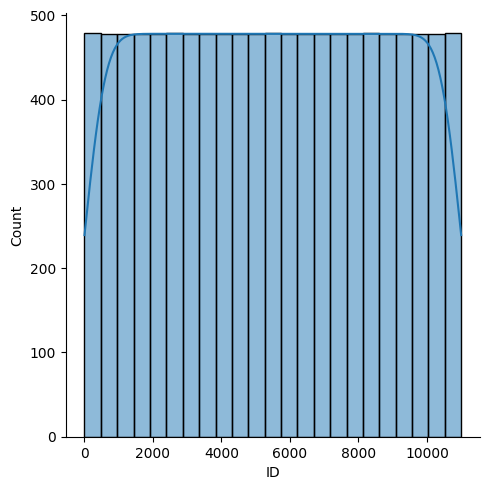

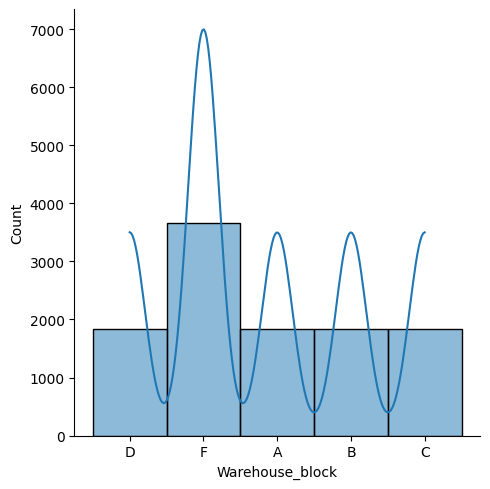

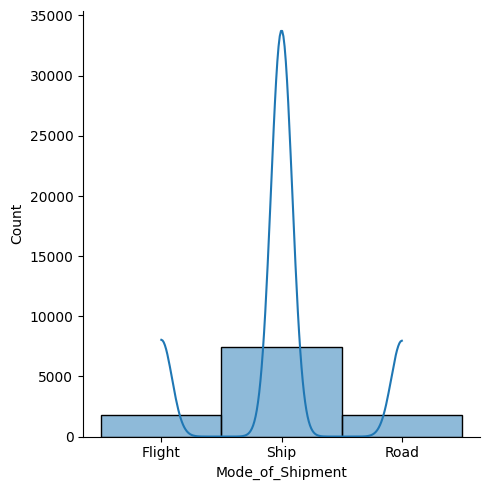

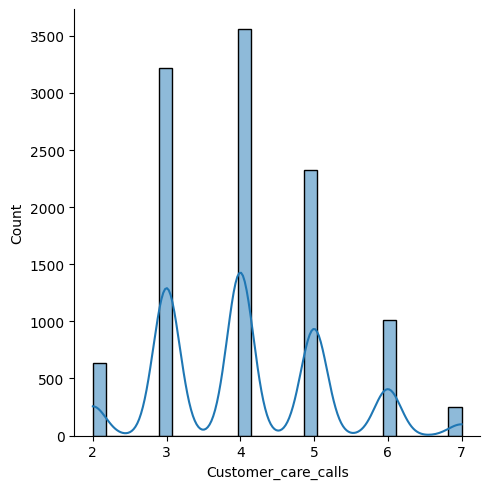

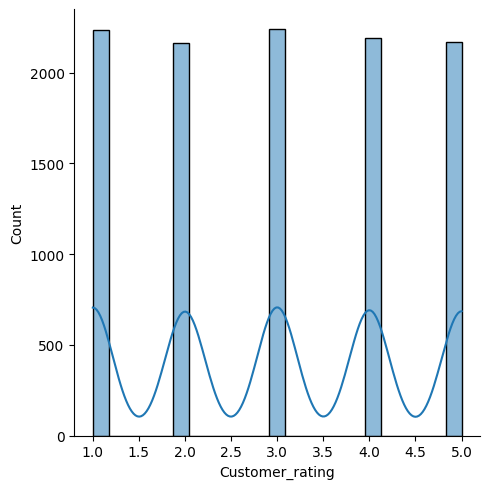

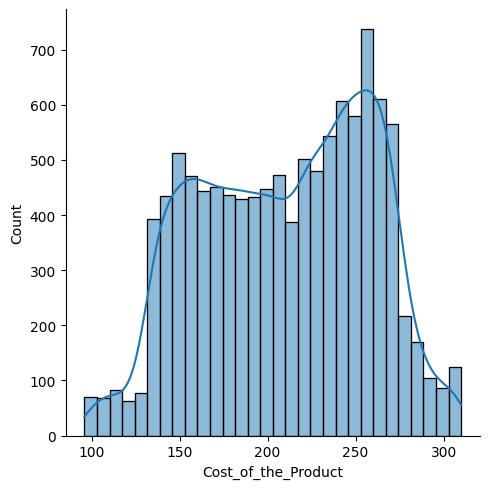

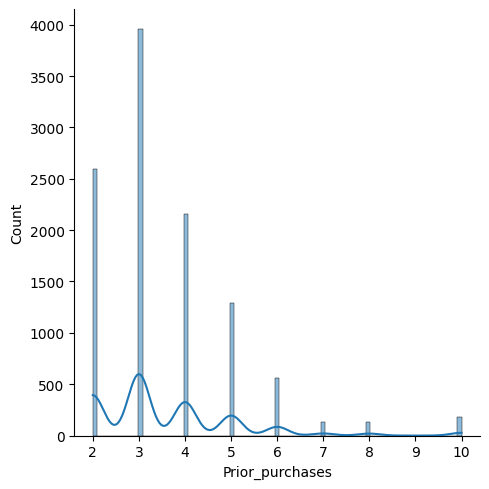

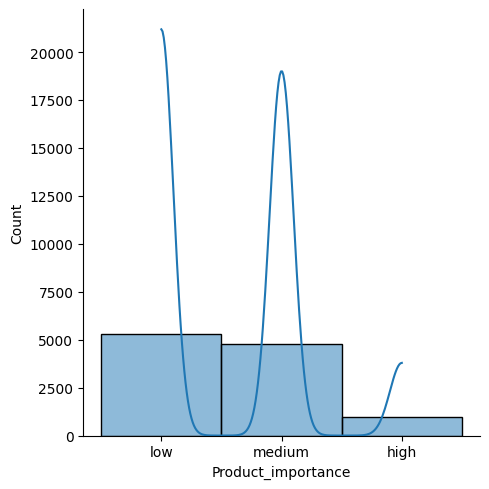

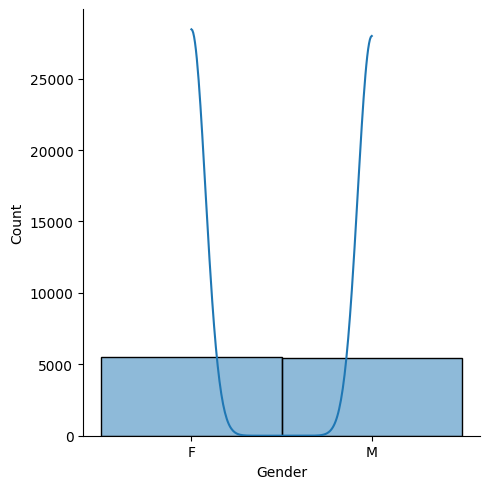

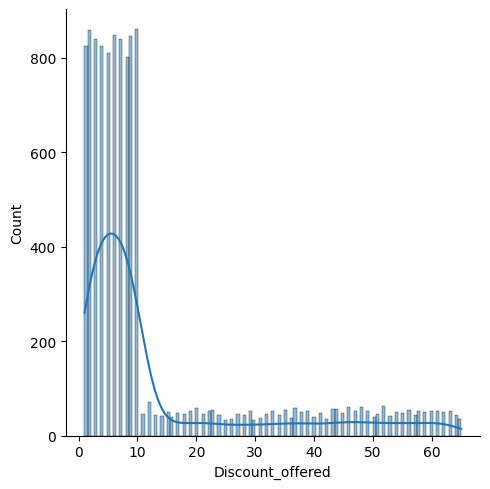

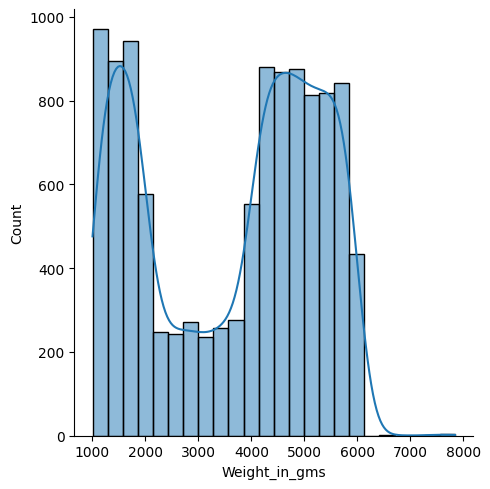

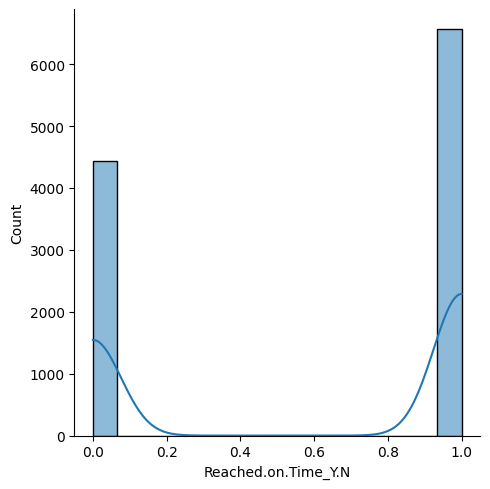

In [ ]:
for i in df.columns:
  sns.displot(df[i], kde = True)

In [ ]:
les = LabelEncoder()
df['Product_importance'] = les.fit_transform(df.Product_importance)

In [ ]:
df.Product_importance.nunique()

3

In [ ]:
les = LabelEncoder()
df['Warehouse_block'] = les.fit_transform(df.Warehouse_block)

In [ ]:
df.Warehouse_block.nunique()

5

In [ ]:
les = LabelEncoder()
df['Mode_of_Shipment'] = les.fit_transform(df.Mode_of_Shipment)

In [ ]:
df.Mode_of_Shipment.nunique()

3

In [ ]:
client_sex = {'M':0, 'F':1}
df['Gender'] = df.Gender.map(client_sex)

In [ ]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,1,44,1233,1
1,2,4,0,4,5,216,2,1,0,59,3088,1
2,3,0,0,2,2,183,4,1,0,48,3374,1
3,4,1,0,3,3,176,4,2,0,10,1177,1
4,5,2,0,2,2,184,3,2,1,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,1,1,1538,1
10995,10996,1,2,4,1,232,5,2,1,6,1247,0
10996,10997,2,2,5,4,242,5,1,1,4,1155,0
10997,10998,4,2,5,2,223,6,2,0,2,1210,0


In [ ]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

##splitting dataset into input and output data X & Y respectively

In [ ]:
X = df.iloc[:,0:11]
X

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,3,0,4,2,177,3,1,1,44,1233
1,2,4,0,4,5,216,2,1,0,59,3088
2,3,0,0,2,2,183,4,1,0,48,3374
3,4,1,0,3,3,176,4,2,0,10,1177
4,5,2,0,2,2,184,3,2,1,46,2484
...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,1,1,1538
10995,10996,1,2,4,1,232,5,2,1,6,1247
10996,10997,2,2,5,4,242,5,1,1,4,1155
10997,10998,4,2,5,2,223,6,2,0,2,1210


In [ ]:
X.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,3,0,4,2,177,3,1,1,44,1233
1,2,4,0,4,5,216,2,1,0,59,3088
2,3,0,0,2,2,183,4,1,0,48,3374
3,4,1,0,3,3,176,4,2,0,10,1177
4,5,2,0,2,2,184,3,2,1,46,2484


In [ ]:
y = df[['Reached.on.Time_Y.N']]
y.head()

,Reached.on.Time_Y.N
0,1
1,1
2,1
3,1
4,1


##implementing the train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8249, 11)
(2750, 11)
(8249, 1)
(2750, 1)


##ML with Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1 = LinearRegression() # object of linear regression

In [ ]:
model1.fit(X_train,y_train) #training phase

LinearRegression()

In [ ]:
X_test

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
107,108,4,2,4,5,216,3,0,0,26,2053
5594,5595,0,1,3,1,220,3,1,1,6,5572
6997,6998,4,0,3,2,215,4,1,1,3,4042
3984,3985,3,0,5,1,160,5,1,1,1,4672
3111,3112,1,2,5,4,229,2,2,1,44,2419
...,...,...,...,...,...,...,...,...,...,...,...
3944,3945,0,2,3,5,159,2,2,0,6,5804
10782,10783,3,2,2,1,240,2,1,0,8,1144
9604,9605,2,0,4,2,134,3,2,1,1,4064
2513,2514,4,2,3,2,270,2,2,1,59,3706


In [ ]:
y_pred = model1.predict(X_test) # predicted value
y_pred

array([[0.97964328],
       [0.47560825],
       [0.46859696],
       ...,
       [0.3428806 ],
       [0.97420009],
       [0.35078762]])

In [ ]:
y_test #actual output

,Reached.on.Time_Y.N
107,1
5594,1
6997,0
3984,0
3111,1
...,...
3944,0
10782,1
9604,1
2513,1


In [ ]:
# to check the accuracy score

from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.21634894729312049

## ML with logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#creating the object of LogisticRegression

model1 = LogisticRegression()

In [ ]:
#training phase
model1.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model1.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test  # actual output

,Reached.on.Time_Y.N
107,1
5594,1
6997,0
3984,0
3111,1
...,...
3944,0
10782,1
9604,1
2513,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6629090909090909
